In [1]:
# Use the aggregated hoshi_workflow namespace for imports
import hoshi_workflow.hoshi_reader as hr
import importlib

# If you edit the underlying module and want to reload in a running
# notebook kernel, reload the module object referenced by `hr`:
importlib.reload(hr)
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Example usage of HoshiReader
# Set the path to the hoshi model directorym
# Here is a fake model for testing, you may replace it with your own model path
path = "../example_model/fake_model"

In [3]:
# You could firstly initialize HoshiModel to access model directories
# same as example_hoshi_reader.ipynb

# Initialize HoshiModel and HoshiHistory
#hm = hr.HoshiModel(path)

In [4]:
# you can also directly access HoshiCxdata with the model's path and a specified nstg (number of stages)
# here we use nstg=2468 as an example, its the only one in the fake model
cxdata = hr.HoshiCxdata(path, 2468)
print(cxdata.var_names)

# Noted that for HoshiCxdata, HoshiReader will fistly dispose the output data file
# `cxdat[NSTG]` into a new file `parsed_cxdat_[NSTG].txt` in the same directory,
# then read the parsed file to get data.
# So you may find the new file after running this code.
# If a parsed file already exists, it will be used directly to save time.

['j', 'Mr', 'dtprv', 'dMr', 'n', 'p', 'd', 't', 'he3', 'he4', 'li6', 'li7', 'be7', 'be9', 'b8', 'b10', 'b11', 'c12', 'c13', 'n13', 'n14', 'n15', 'o14', 'o15', 'o16', 'o17', 'o18', 'f17', 'f18', 'f19', 'ne18', 'ne19', 'ne20', 'ne21', 'ne22', 'na21', 'na22', 'na23', 'mg22', 'mg23', 'mg24', 'mg25', 'mg26', 'al25', 'al-6', 'al*6', 'al27', 'si26', 'si27', 'si28', 'si29', 'si30', 'si31', 'si32', 'p29', 'p30', 'p31', 'p32', 'p33', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 'cl33', 'cl34', 'cl35', 'cl36', 'cl37', 'ar34', 'ar35', 'ar36', 'ar37', 'ar38', 'ar39', 'ar40', 'k37', 'k38', 'k39', 'k40', 'k41', 'ca38', 'ca39', 'ca40', 'ca41', 'ca42', 'ca43', 'sc41', 'sc42', 'sc43', 'sc44', 'sc45', 'ti43', 'ti44', 'ti45', 'ti46', 'ti47', 'ti48', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50', 'v51', 'cr47', 'cr48', 'cr49', 'cr50', 'cr51', 'cr52', 'cr53', 'cr54', 'mn49', 'mn50', 'mn51', 'mn52', 'mn53', 'mn54', 'mn55', 'fe51', 'fe52', 'fe53', 'fe54', 'fe55', 'fe56', 'fe57', 'fe58', 'co53', 'co54', 'co55',

In [5]:
# the parsed cxdata is also stored in a pandas DataFrame
df = cxdata.dataframe
print(df)

           j         Mr     dtprv           dMr             n             p  \
0        1.0   0.000003  0.053816  2.755923e-06  8.082710e-04  3.047862e-07   
1        2.0   0.000008  0.066857  5.331721e-06  8.083173e-04  3.045058e-07   
2        3.0   0.000018  0.026184  1.029180e-05  8.076439e-04  3.046361e-07   
3        4.0   0.000038  0.017973  1.986302e-05  8.068686e-04  3.046013e-07   
4        5.0   0.000077  0.066176  3.832685e-05  8.046816e-04  3.053159e-07   
...      ...        ...       ...           ...           ...           ...   
1019  1020.0  19.989110  0.000218  6.567547e-11  1.000000e-50  7.459861e-01   
1020  1021.0  19.989110  0.000218  5.946177e-11  1.000000e-50  7.459861e-01   
1021  1022.0  19.989110  0.000218  5.383427e-11  1.000000e-50  7.459861e-01   
1022  1023.0  19.989110  0.000218  4.873613e-11  1.000000e-50  7.459861e-01   
1023  1024.0  19.989110  0.000218  4.412826e-11  1.000000e-50  7.459861e-01   

                 d             t           he3     

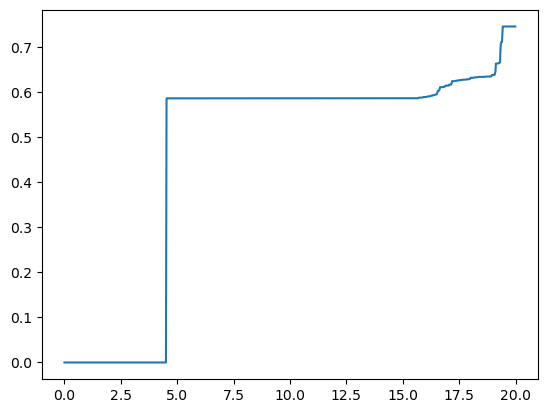

In [6]:
# also you can use data() method to get column data
h1_mass_fraction = cxdata.data("p")
mass = cxdata.data("Mr")
plt.plot(mass, h1_mass_fraction)

In [7]:
# you can also get isotope yield data with a specified mass cut index
# the return value is a float number in unit of solar mass
y_n14 = cxdata.isotope_yield("n14", mass_cut_idx=10)
print(y_n14)

0.02826315998621761


In [8]:
dict_yield = cxdata.yields_dictionary(mass_cut_idx=10)
print(dict_yield)

{'n': 8.982777408648612e-05, 'p': 9.310276690458501, 'd': 9.56487240218047e-11, 't': 2.4876683577738286e-11, 'he3': 4.697120382211216e-05, 'he4': 6.3088980996587924, 'li6': 5.074553254444429e-15, 'li7': 2.4059579064322218e-09, 'be7': 9.303633206931407e-10, 'be9': 4.407342891161786e-14, 'b8': 1.1862163942585212e-17, 'b10': 3.846202338257464e-17, 'b11': 3.944077752212004e-14, 'c12': 0.19772628461822575, 'c13': 0.0004685263256330853, 'n13': 3.544308217785811e-09, 'n14': 0.02826315998621761, 'n15': 1.27212981935035e-06, 'o14': 1.434646343722611e-15, 'o15': 5.22784488958411e-10, 'o16': 1.711964277021743, 'o17': 6.820365234630713e-06, 'o18': 1.6978396757182008e-07, 'f17': 2.3921671096438996e-14, 'f18': 7.527655286758935e-08, 'f19': 9.733782912514659e-09, 'ne18': 2.555072482244546e-18, 'ne19': 1.4343807867963303e-13, 'ne20': 0.3469314336901811, 'ne21': 2.0653545903346955e-05, 'ne22': 5.258169740635141e-06, 'na21': 5.068050700360065e-11, 'na22': 1.2932389270342343e-06, 'na23': 0.00261014306327